In this fine we generate our **Best** Submission by multiple models' outputs combinations using soft voting.

*   Kaggle Score: 0.82354
*   Fairness: 4.234947908212947




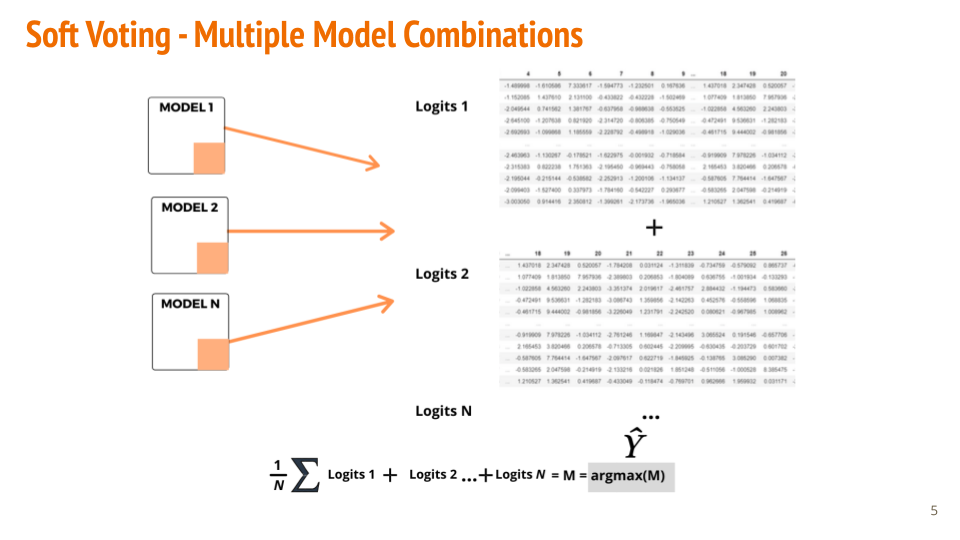

In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
def macro_disparate_impact(X, y):
    names = pd.read_csv("../input/defiiainsatoulouse/categories_string.csv")['0'].to_dict()

    jobs = y['Category']
    jobs = jobs.map(names)
    jobs = jobs.rename('job')
    
    genders = X['gender']

    people = pd.concat((jobs, genders), axis='columns')
    
    counts = people.groupby(['job', 'gender']).size().unstack('gender')
    counts['disparate_impact'] = counts[['M', 'F']].max(axis='columns') / counts[['M', 'F']].min(axis='columns')
    
    return counts['disparate_impact'].mean()

In [ ]:
logits_1 = pd.read_csv("logits_bart_preprocessed_data.csv")
logits_2 = pd.read_csv("logits_bert_preprocessed_data.csv")
logits_3 = pd.read_csv("logits_bert_non_preprocessed_data.csv")
logits_4 = pd.read_csv("logits_robertabase_preprocessed_data.csv")
logits_5 = pd.read_csv("logits_robertalarge_preprocessed_data.csv")
logits_6 = pd.read_csv("logits_xlnetlarge_preprocessed_data.csv")

result_sum = ((logits_1 + logits_2 + logits_3 + logits_4 + logits_5 + logits_6))/6
array = np.asarray(result_sum)
preds_flat = np.argmax(array, axis=1).flatten()

##### Generating Submission File

In [ ]:
preprocessed_test = pd.read_csv("yogeshi/PreprocessedDataTest.csv")

final_df = pd.DataFrame()
final_df['Id'] = preprocessed_test.index
final_df["Category"] = preds_flat
file_final = final_df[['Id','Category']]

file_final.to_csv("pred_logits1_2_3_4_5_6.csv", index=False) 
#F1 Kaggle 0.82354

In [ ]:
preprocessed_test['Category'] = final_df.Category
macro_disparate_impact(preprocessed_test,preprocessed_test)
# Fairness: 4.234947908212947

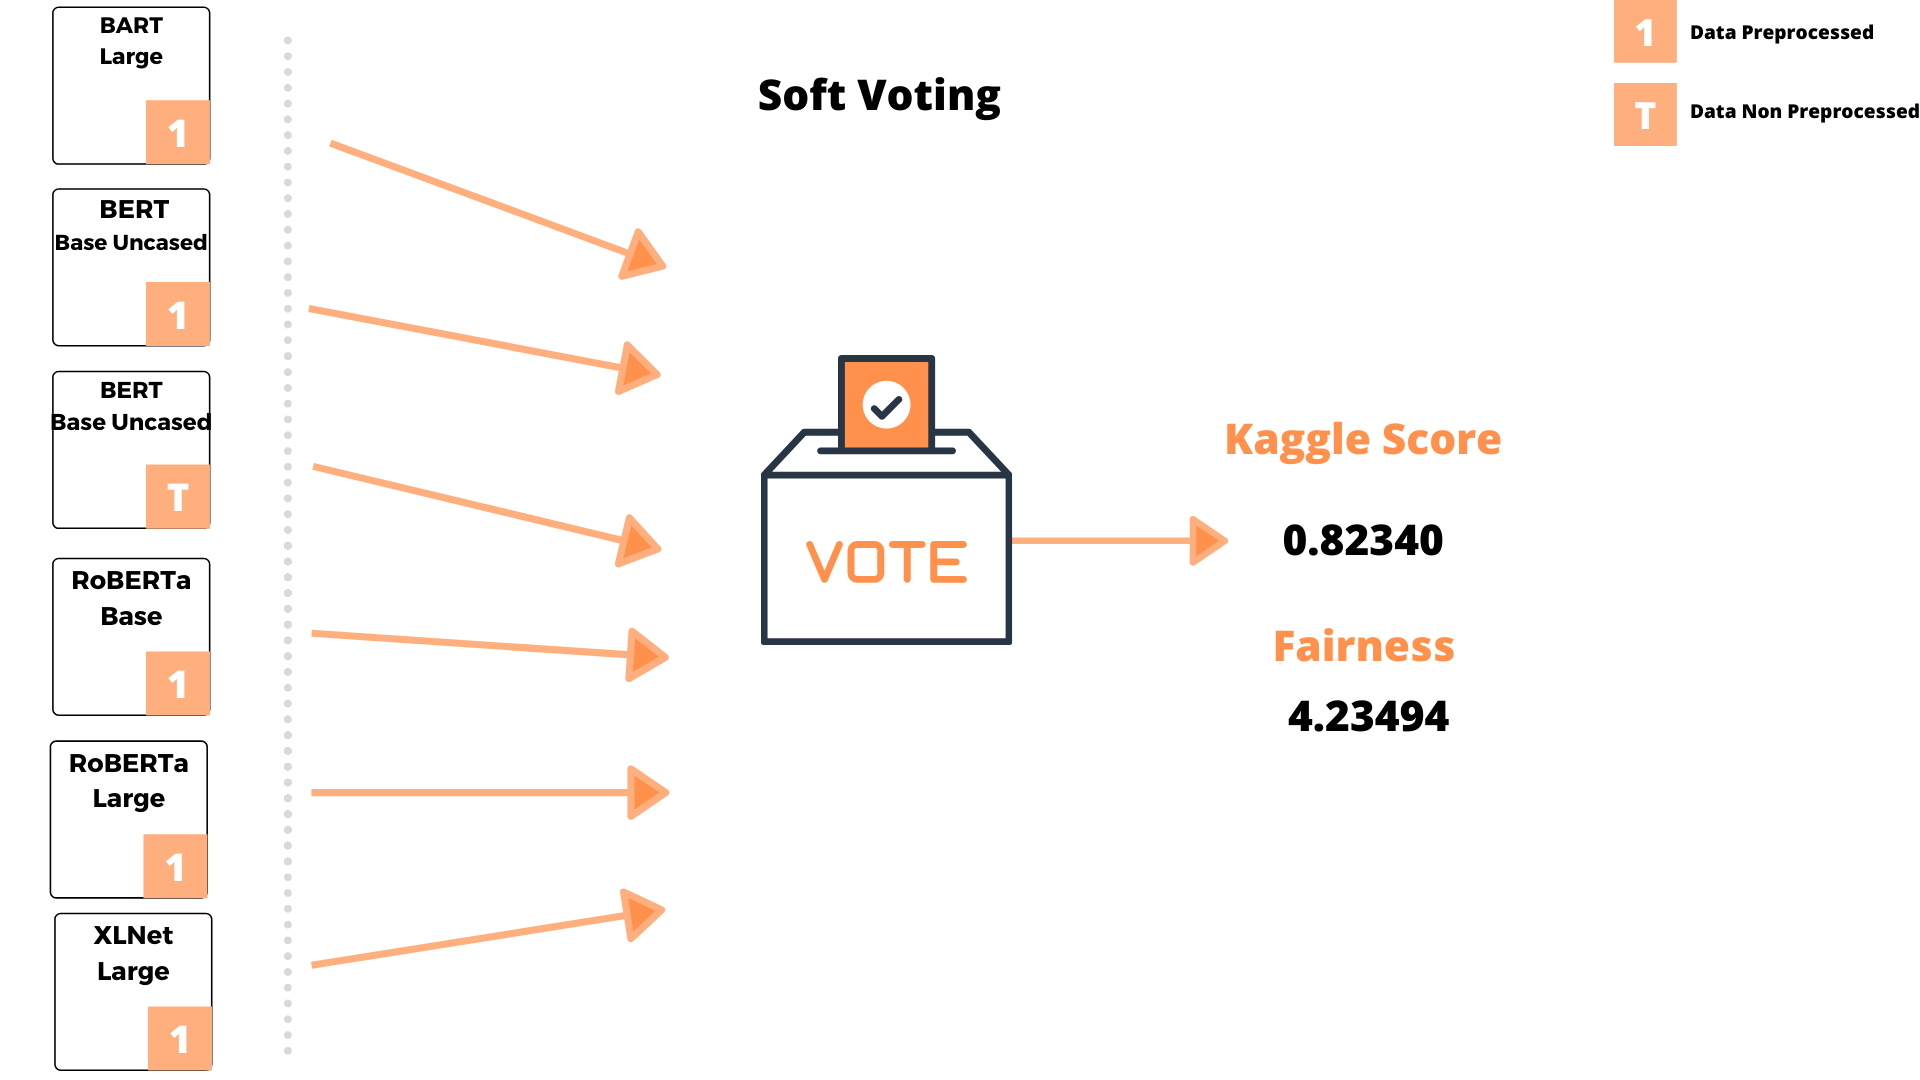